<a href="https://colab.research.google.com/github/aynaval/NLP-basics/blob/main/spam_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [24]:
pd.set_option('display.max_columns', None)  

In [58]:
data = pd.read_csv('/content/drive/MyDrive/NLP/Spam Detection/SMSSpamCollection.txt'
                       ,sep='\t',names = ['lable','message'])

In [59]:
data.head()

,lable,message
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


In [60]:
data.tail()

,lable,message
5567,spam,"This is the 2nd time we have tried 2 contact u. U have won the £750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate."
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other suggestions?"
5570,ham,The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free
5571,ham,Rofl. Its true to its name


In [61]:
data.sample(5)

,lable,message
4622,ham,"Received, understood n acted upon!"
4546,ham,Never y lei... I v lazy... Got wat? Dat day ü send me da url cant work one...
2285,ham,"Velly good, yes please!"
193,ham,Hi :)finally i completed the course:)
5067,ham,I calls you later. Afternoon onwords mtnl service get problem in south mumbai. I can hear you but you cann't listen me.


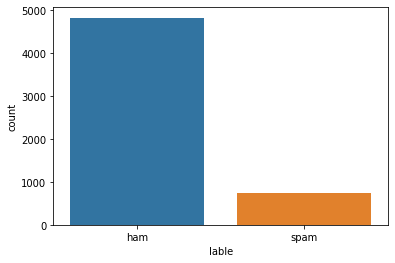

In [63]:
sns.countplot(x= data['lable']);

There is class imbalance.

In [64]:
import re
import nltk

In [65]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [66]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [67]:
ps = PorterStemmer()

In [68]:
corpus = []

In [69]:
# cleaning data 
for i in data['message']:
    review = re.sub('[^a-zA-Z]', ' ', i)
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [70]:
data.shape , len(corpus)

((5572, 2), 5572)

In [71]:
data['message'].sample(2)

257     Mmm so yummy babe ... Nice jolt to the suzy
5100               Aight, call me once you're close
Name: message, dtype: object

In [72]:
corpus[2069]

'hard believ thing like say lie think twice say anyth'

In [73]:
corpus[2718]

'oki thanx'

In [76]:
X = corpus
y = pd.get_dummies(data['lable']).values

In [75]:
y

array([[1, 0],
       [1, 0],
       [0, 1],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]], dtype=uint8)

In [55]:
corpus[0:10]

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun',
 'winner valu network custom select receivea prize reward claim call claim code kl valid hour',
 'mobil month u r entitl updat latest colour mobil camera free call mobil updat co free']

In [77]:
data['lable'].unique()

array(['ham', 'spam'], dtype=object)

In [79]:
y = data['lable'].map({'spam':1,'ham':0})

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(corpus, y , test_size=0.2, random_state=0)

In [83]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1500)
X_train = cv.fit_transform(X_train).toarray()
X_test = cv.transform(X_test)

In [95]:
set(X_test.toarray()[0])

{0, 1, 2, 3}

In [96]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

In [104]:
y_train_pred=classifier.predict(X_train)
y_test_pred=classifier.predict(X_test)

In [105]:
print(classifier.score(X_train,y_train))
print(classifier.score(X_test,y_test))

0.9847431007404084
0.9820627802690582
